In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Flight_Price.csv")

In [3]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [5]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

C:\Users\Shruti Sharma\AppData\Local\Temp\ipykernel_51600\2901330846.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\Shruti Sharma\AppData\Local\Temp\ipykernel_51600\2901330846.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
C:\Users\Shruti Sharma\AppData\Local\Temp\ipykernel_51600\2901330846.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\Shruti Sharma\AppData\Local\

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [7]:
duration = df['Duration'].str.extract('(?P<Hours>\d+)h (?P<Minutes>\d+)m', expand=True).fillna(0)
df['Duration_Minutes'] = duration['Hours'].astype(int) * 60 + duration['Minutes'].astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shruti Sharma\AppData\Local\Temp\ipykernel_51600\343653372.py:1: SyntaxWarning: invalid escape sequence '\d'
  duration = df['Duration'].str.extract('(?P<Hours>\d+)h (?P<Minutes>\d+)m', expand=True).fillna(0)


In [8]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route', 'Additional_Info'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285


In [9]:
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
X = df.drop('Price', axis=1)
y = df['Price']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

In [15]:
results = {}
for model_name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

In [16]:
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("Model Performance Comparison:\n", results_df)

Model Performance Comparison:
                                    MAE           MSE        R2
Random Forest              1180.939200  3.647813e+06  0.827640
Decision Tree              1391.507534  6.607810e+06  0.687780
Linear Regression          2588.182376  1.263973e+07  0.402771
Support Vector Regression  3465.579377  2.061207e+07  0.026077


In [17]:
best_model_name = results_df.index[0]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

print(f"The best-performing model is: {best_model_name}")

The best-performing model is: Random Forest


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


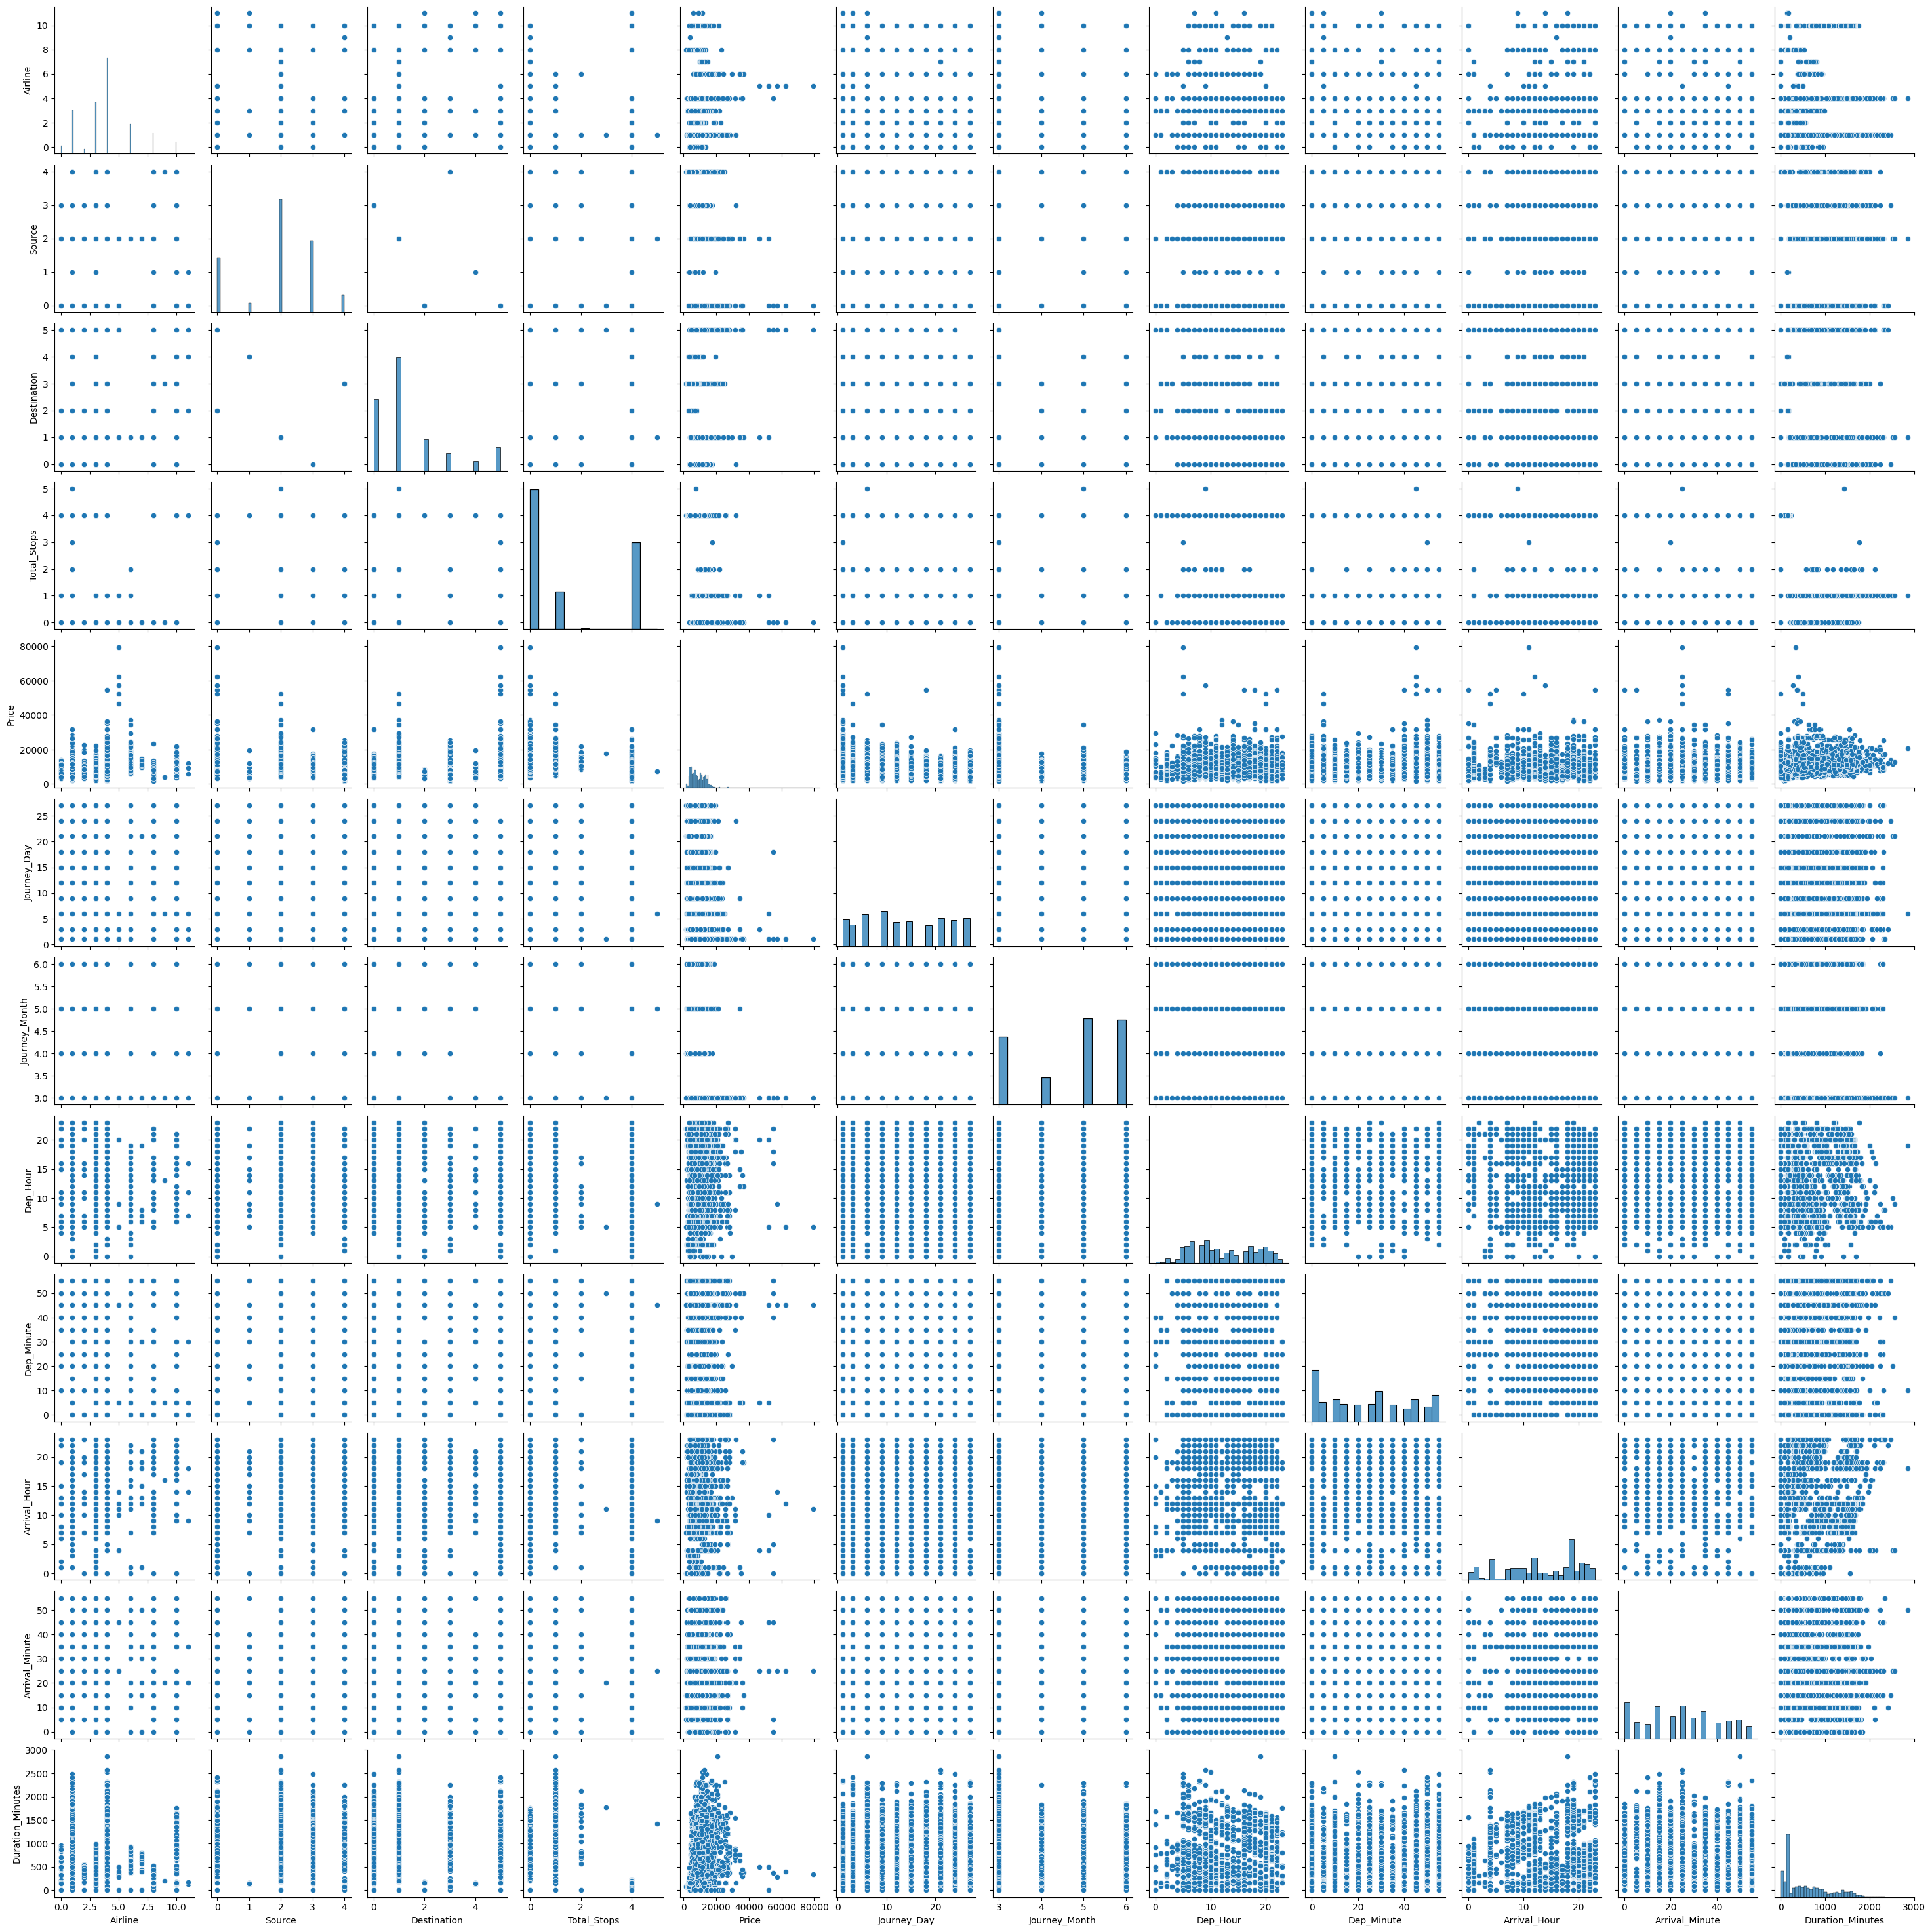

In [19]:
sns.pairplot(df)

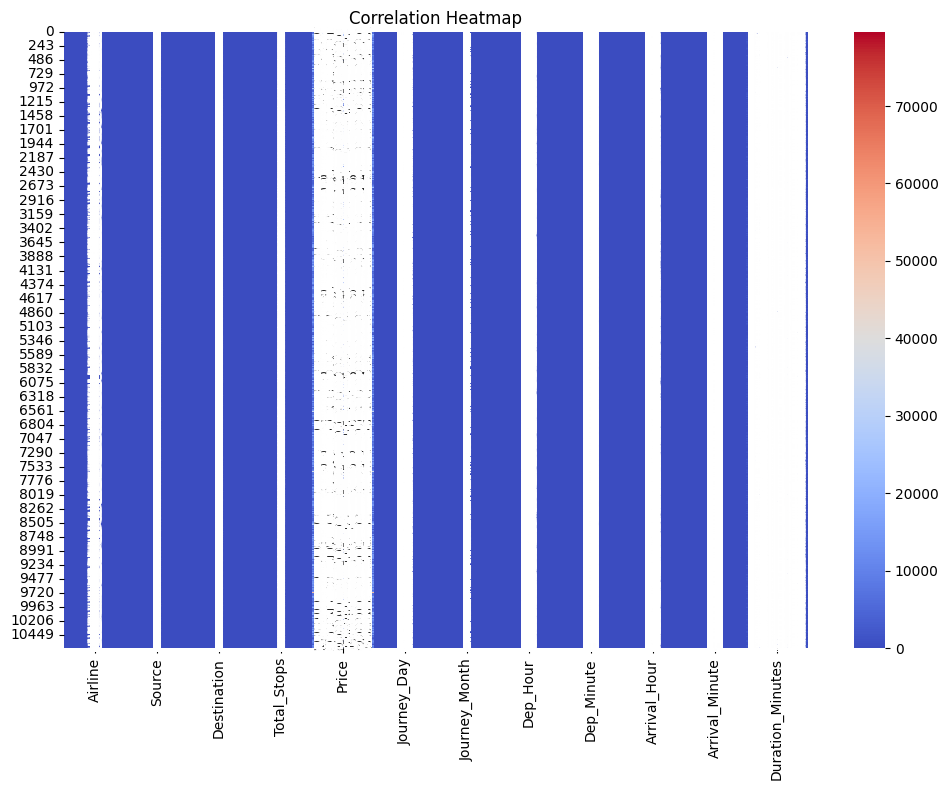

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
Airline,1.000000,-0.013401,0.018479,0.035732,-0.039520,0.026238,0.024643,-0.035194,-0.060044,-0.007491,-0.071089,-0.153889
Source,-0.013401,1.000000,-0.592574,-0.225557,0.015998,0.004898,0.183268,0.059044,-0.056991,0.025632,0.021040,0.152903
Destination,0.018479,-0.592574,1.000000,0.337756,-0.071112,-0.040998,-0.364686,-0.072979,0.127892,-0.039710,0.017196,-0.223421
Total_Stops,0.035732,-0.225557,0.337756,1.000000,-0.571179,0.029056,-0.026278,0.039105,0.049090,-0.095748,0.175952,-0.528930
Price,-0.039520,0.015998,-0.071112,-0.571179,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155,0.436980
Journey_Day,0.026238,0.004898,-0.040998,0.029056,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.027480
Journey_Month,0.024643,0.183268,-0.364686,-0.026278,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,-0.011608
Dep_Hour,-0.035194,0.059044,-0.072979,0.039105,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.001893
Dep_Minute,-0.060044,-0.056991,0.127892,0.049090,-0.024492,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594,0.035899
Arrival_Hour,-0.007491,0.025632,-0.039710,-0.095748,0.024264,-0.003192,-0.003941,0.005215,0.043054,1.000000,-0.154362,0.009112
